<a href="https://colab.research.google.com/github/SWND03/PRODIGY_DS_05/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

Load the dataset


In [2]:
df = pd.read_csv('/content/US_Accidents_Dec20_Updated (1).csv')

Preprocessing the data

In [3]:
print(df.head())

    ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         2  2019-05-21 08:29:55  2019-05-21 09:29:40  34.808868   
1  A-2         2  2019-10-07 17:43:09  2019-10-07 19:42:50  35.090080   
2  A-3         2  2020-12-13 21:53:00  2020-12-13 22:44:00  37.145730   
3  A-4         2  2018-04-17 16:51:23  2018-04-17 17:50:46  39.110390   
4  A-5         3  2016-08-31 17:40:49  2016-08-31 18:10:49  26.102942   

    Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0  -82.269157  34.808868  -82.269157           0.0   
1  -80.745560  35.090080  -80.745560           0.0   
2 -121.985052  37.165850 -121.988062           1.4   
3 -119.773781  39.110390 -119.773781           0.0   
4  -80.265091  26.102942  -80.265091           0.0   

                                         Description  ...  Roundabout Station  \
0            Accident on Tanner Rd at Pennbrooke Ln.  ...       False   False   
1  Accident on Houston Branch Rd at Providence Br...  ...       False   Fa

In [4]:
print(df.isnull().sum())

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                   1586
End_Lng                   1586
Distance(mi)                 0
Description                  0
Number                   10500
Street                       0
Side                         0
City                         1
County                       0
State                        0
Zipcode                      6
Country                      0
Timezone                    17
Airport_Code                35
Weather_Timestamp          243
Temperature(F)             352
Wind_Chill(F)             6552
Humidity(%)                374
Pressure(in)               300
Visibility(mi)             377
Wind_Direction             337
Wind_Speed(mph)           1652
Precipitation(in)         7141
Weather_Condition          388
Amenity                      1
Bump                         1
Crossing

In [5]:
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity'])

median_wind_speed = df['Wind_Speed(mph)'].median()
df['Wind_Speed(mph)'].fillna(median_wind_speed, inplace=True)

mode_weather_condition = df['Weather_Condition'].mode()[0]
df['Weather_Condition'].fillna(mode_weather_condition, inplace=True)

df['Amenity'].fillna(False, inplace=True)


In [ ]:
print(df.isnull().sum())

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                   4205
End_Lng                   4205
Distance(mi)                 0
Description                  0
Number                   27879
Street                       0
Side                         0
City                         4
County                       0
State                        0
Zipcode                     13
Country                      0
Timezone                    45
Airport_Code                92
Weather_Timestamp          681
Temperature(F)             982
Wind_Chill(F)            17596
Humidity(%)               1039
Pressure(in)               839
Visibility(mi)            1049
Wind_Direction             924
Wind_Speed(mph)              0
Precipitation(in)        19203
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing

In [6]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Date'] = df['Start_Time'].dt.date
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df = df.dropna(subset=['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Severity'])


In [7]:
print(df.isnull().sum())

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                   1586
End_Lng                   1586
Distance(mi)                 0
Description                  0
Number                   10376
Street                       0
Side                         0
City                         1
County                       0
State                        0
Zipcode                      6
Country                      0
Timezone                    17
Airport_Code                35
Weather_Timestamp          237
Temperature(F)             345
Wind_Chill(F)             6543
Humidity(%)                367
Pressure(in)               294
Visibility(mi)             370
Wind_Direction             328
Wind_Speed(mph)              0
Precipitation(in)         7130
Weather_Condition            0
Amenity                      0
Bump                         1
Crossing

Analyze Accident Patterns

<ipython-input-8-27e7938edb99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


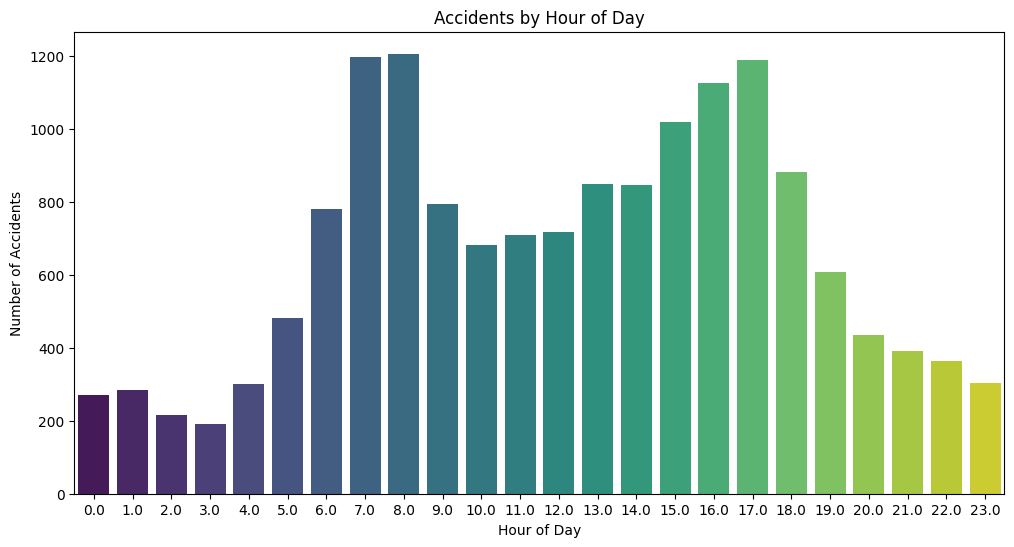

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


<ipython-input-9-392419d21f81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


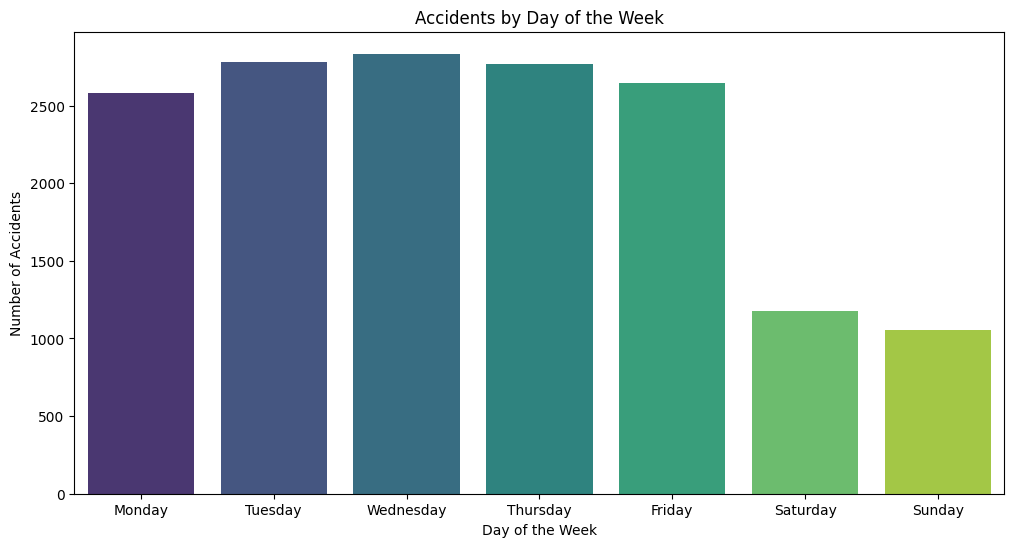

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


<ipython-input-10-a1ae74928199>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index[:10], palette='viridis')


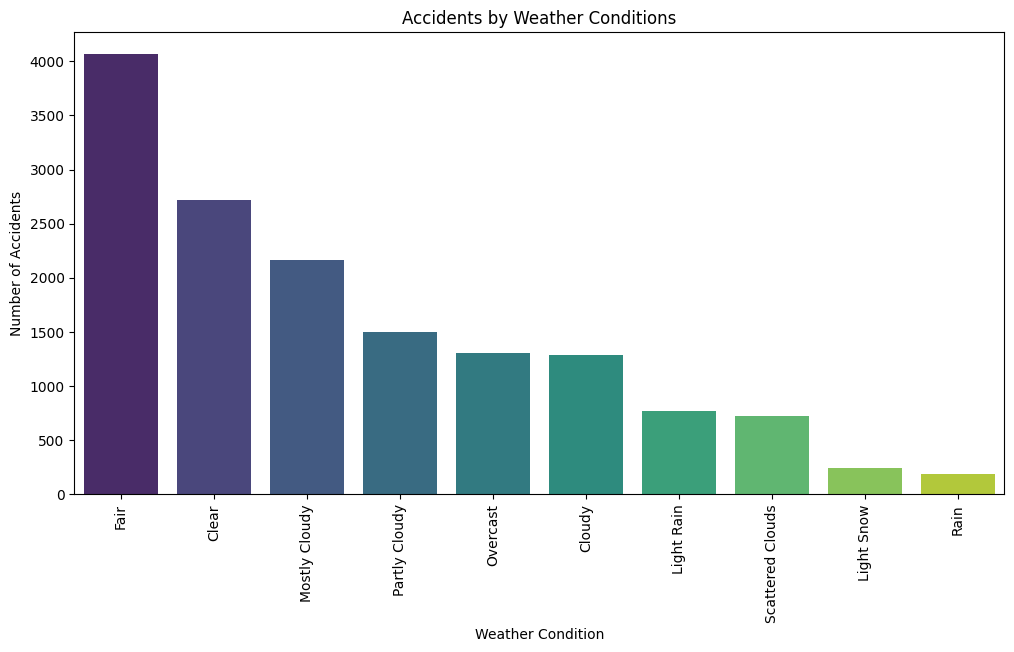

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index[:10], palette='viridis')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


 Visualize Accident Hotspots

In [11]:
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('accident_heatmap.html')
m
